# Answers to Some Research Questions

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_colwidth = 300
pd.options.display.max_columns = 300
pd.options.display.max_rows = 300

In [3]:
def group_and_count(df, groupby_column, with_pct=False, with_avg=False):
    result = df.groupby(groupby_column).size().sort_values(ascending=False).reset_index().rename(columns={0: 'count'})
    if with_pct:
        result['count_pct'] = (result['count'] / result['count'].sum())*100
    if with_avg:
        result['count_avg'] = result['count'].mean()
    return result

In [4]:
sns.set(style="whitegrid", palette="pastel")
figsize=(20, 10)
title_fontsize = 20
axis_fontsize = 10

PLOTS_DIR = "plots"

## Read Data

In [5]:
df = pd.read_json('data/liar_dataset.json')

In [6]:
df.shape

(21026, 32)

In [7]:
df['context_tag_clean'] = df.apply(lambda row: row['context_tag'][0] if row['context_tag'] else row['context_tag'], axis=1)

df['statement_date'] = pd.to_datetime(df['statement_date'], unit='ms')
df['statement_date'] = df['statement_date'].fillna(-1)
df.drop(df[df['statement_date'] == -1].index, inplace=True)
df['statement_date'] = df['statement_date'].replace('-1', np.nan)

df['statement_year'] = df["statement_date"].astype("datetime64").dt.year


In [8]:
df.head(5)

,author_name_slug,context,label,ruling_date,speaker_current_job,speaker_first_name,speaker_home_state,speaker_last_name,statement,statement_date,statement_id,statement_type,statement_type_description,label_as_nb,clean_context,statement_year,speaker_full_name,speakers_job_title_cleaned,CANDIDATE NAME,primary_votes_senate_2014,primary_votes_senate_2014_pct,primary_votes_house_2014,primary_votes_house_2014_pct,primary_votes_senate_2016,primary_votes_senate_2016_pct,primary_votes_house_2016,primary_votes_house_2016_pct,primary_votes_all_2012,primary_votes_all_2012_pct,speaker,speaker_tag,context_tag,context_tag_clean
0,meghan-ashford-grooms,in a Web site video,pants-fire,2010-01-12T15:52:21,,Barbara Ann,,Radnofsky,The attorney general requires that rape victims pay for the rape kit.,2009-10-22,1.0,Claim,blog post,16.0,others,2009,"Radnofsky, Barbara Ann",,None,None,NaN,None,NaN,None,NaN,None,NaN,None,None,barbara-ann-radnofsky,PERSON,"[web, 163]",web
1,jody-kyle,an interview on MSNBC,true,2007-10-03T00:00:00,author,Mike,Arkansas,Huckabee,Hes sued gun manufacturers. He was supportive of Brady. He was supportive of things like assault weapon bans.,2007-09-21,100.0,Attack,<p>\r\n\tA criticism of a candidate.</p>\r\n,6.0,others,2007,"Huckabee, Mike",author,None,None,NaN,None,NaN,None,NaN,None,NaN,None,None,mike-huckabee,PERSON,"[interview, 219]",interview
10,sean-gorman,a radio show.,true,2015-09-29T00:00:00,author,Mike,Arkansas,Huckabee,"Six of the 10 richest counties in the United States surround Washington, D.C.",2015-09-24,11356.0,Claim,blog post,6.0,tv,2015,"Huckabee, Mike",author,None,None,NaN,None,NaN,None,NaN,None,NaN,None,None,mike-huckabee,PERSON,"[show, 265]",show
100,louis-jacobson,"an interview on Fox News' ""On the Record"" with Greta Van Susteren",pants-fire,2013-05-20T18:04:58,Congresswoman,Michele,Minnesota,Bachmann,"The IRS is going to be in charge of a huge national database on health care that will include Americans&rsquo; personal, intimate, most close-to-the-vest-secrets.",2013-05-15,7802.0,Claim,blog post,16.0,fox,2013,"Bachmann, Michele",congressman,"Bachmann, Michele",None,NaN,None,NaN,None,NaN,None,NaN,14569,0.803452,michele-bachmann,PERSON,"[news, 478]",news
1000,tom-kertscher,a radio ad,barely-true,2012-05-29T09:14:31,,,,National Rifle Association,"Says Tom Barrett voted to ban 15 different kinds of guns, even a lot of common deer rifles.",2012-05-16,5984.0,Attack,<p>\r\n\tA criticism of a candidate.</p>\r\n,12.0,tv,2012,"National Rifle Association,",,None,None,NaN,None,NaN,None,NaN,None,NaN,None,None,national-rifle-association,ORGANIZATION,"[ad, 240]",ad


In [9]:
group_and_count(df, 'label')

,label,count
0,false,3039
1,half-true,3032
2,mostly-true,2910
3,barely-true,2645
4,true,2296
5,pants-fire,1609
6,full-flop,149
7,half-flip,69
8,no-flip,25


In [10]:
group_and_count(df, 'statement_type')

,statement_type,count
0,Claim,13851
1,Attack,1692
2,Flip,231


In [11]:
group_and_count(df, 'speaker_tag')

,speaker_tag,count
0,PERSON,12942
1,O,1837
2,ORGANIZATION,936
3,LOCATION,59


In [12]:
group_and_count(df, 'speaker_home_state')[:10]

,speaker_home_state,count
0,,3836
1,New York,1465
2,Texas,1424
3,Florida,1375
4,Wisconsin,1032
5,Illinois,763
6,Ohio,622
7,Georgia,575
8,Virginia,533
9,Rhode Island,456


In [13]:
group_and_count(df, 'speakers_job_title_cleaned')[:10]

,speakers_job_title_cleaned,count
0,,4907
1,senator,1970
2,president,1846
3,houseman,1654
4,governor,1126
5,congressman,663
6,mayor,237
7,milwaukee county executive,211
8,u.s. energy secretary,175
9,attorney,144


In [14]:
group_and_count(df, 'context_tag_clean')[:10]

,context_tag_clean,count
0,interview,1753
1,news,1282
2,campaign,1177
3,speech,1107
4,press,1017
5,debate,1010
6,ad,973
7,post,631
8,tweet,573
9,radio,315


In [15]:
group_and_count(df, 'speaker')[:10]

,speaker,count
0,donald-trump,639
1,barack-obama,619
2,bloggers,422
3,hillary-clinton,300
4,mitt-romney,216
5,scott-walker,211
6,john-mccain,190
7,chain-email,180
8,rick-perry,175
9,chris-collins,168


In [16]:
group_and_count(df, ['speaker', 'speaker_tag'])[:10]

,speaker,speaker_tag,count
0,donald-trump,PERSON,639
1,barack-obama,PERSON,619
2,bloggers,O,422
3,hillary-clinton,PERSON,300
4,mitt-romney,PERSON,216
5,scott-walker,PERSON,211
6,john-mccain,PERSON,190
7,chain-email,O,180
8,rick-perry,PERSON,175
9,chris-collins,PERSON,168


In [17]:
group_and_count(df[df['speaker'] == 'donald-trump'], 'label', with_pct=True)

,label,count,count_pct
0,false,211,33.020344
1,barely-true,135,21.126761
2,half-true,93,14.553991
3,pants-fire,92,14.397496
4,mostly-true,72,11.267606
5,true,29,4.538341
6,full-flop,7,1.095462


In [18]:
group_and_count(df[df['speaker'] == 'hillary-clinton'], 'label', with_pct=True)

,label,count,count_pct
0,mostly-true,76,25.333333
1,true,72,24.000000
2,half-true,69,23.000000
3,barely-true,41,13.666667
4,false,31,10.333333
5,pants-fire,7,2.333333
6,full-flop,3,1.000000
7,no-flip,1,0.333333


In [19]:
group_and_count(df[df['speaker'] == 'bloggers'], 'label', with_pct=True)

,label,count,count_pct
0,pants-fire,279,66.113744
1,false,87,20.616114
2,barely-true,26,6.161137
3,half-true,15,3.554502
4,mostly-true,10,2.369668
5,true,5,1.184834


## 1. Number of lies per speaker

#### Proportion of False Statements

In [20]:
df1 = group_and_count(df, ['speaker', 'speaker_tag'])
df2 = group_and_count(df[df['label'] == 'false'], 'speaker')

df_false = pd.merge(df1, df2, on='speaker', suffixes=('_total', '_false'))
df_false.head(5)

,speaker,speaker_tag,count_total,count_false
0,donald-trump,PERSON,639,211
1,barack-obama,PERSON,619,71
2,bloggers,O,422,87
3,hillary-clinton,PERSON,300,31
4,mitt-romney,PERSON,216,32


In [21]:
df_false['false_pct'] = df_false.apply(lambda row: row['count_false']/row['count_total']*100, axis=1)
df_false = df_false.sort_values(by=['false_pct'], ascending=False)
df_false.head(5)

,speaker,speaker_tag,count_total,count_false,false_pct
1300,martin-shkreli,PERSON,1,1,100.0
942,ben-affleck,PERSON,1,1,100.0
944,doug-la-follette,PERSON,1,1,100.0
945,doris-kearns-goodwin,PERSON,1,1,100.0
946,donzella-james,PERSON,1,1,100.0


In [22]:
df_false[df_false['false_pct'] != 100].head(5)

,speaker,speaker_tag,count_total,count_false,false_pct
373,sarah-huckabee-sanders,PERSON,5,4,80.0
398,jon-runyan,PERSON,4,3,75.0
399,monica-wehby,PERSON,4,3,75.0
397,nicholas-mattiello,PERSON,4,3,75.0
404,mitch-daniels,PERSON,4,3,75.0


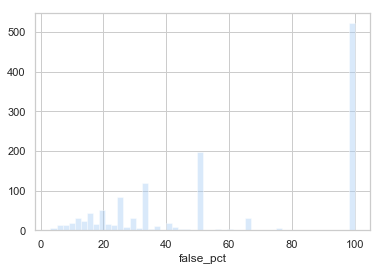

In [23]:
sns.distplot(df_false['false_pct'], kde=False, bins=50);

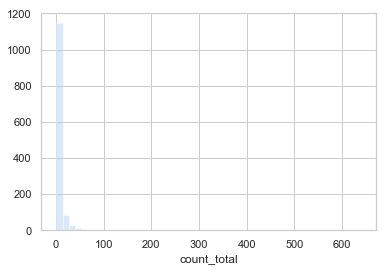

In [24]:
sns.distplot(df_false['count_total'], kde=False, bins=50);

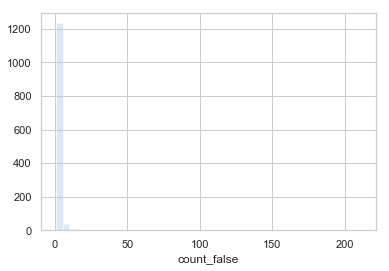

In [25]:
sns.distplot(df_false['count_false'], kde=False, bins=50);

In [26]:
df_false[df_false['false_pct'] == 100].sort_values(by=['count_total'], ascending=False).head(10)

,speaker,speaker_tag,count_total,count_false,false_pct
540,darrell-issa,PERSON,3,3,100.0
705,"students,-parents-and-teachers-supporting-marshall-tuck",O,2,2,100.0
625,stephen-martin,PERSON,2,2,100.0
747,ryan-zinke,PERSON,2,2,100.0
746,wes-riddle,PERSON,2,2,100.0
734,jeanine-pirro,PERSON,2,2,100.0
731,julaine-appling,PERSON,2,2,100.0
726,sydney-batch,PERSON,2,2,100.0
624,bishop-thomas-tobin,PERSON,2,2,100.0
719,beaverton,LOCATION,2,2,100.0


From this dataset information we can see that [Darrell Issa](https://en.wikipedia.org/wiki/Darrell_Issa) lied in 3 out of 3 statements he gave. This makes him an US polititian who proportionally gave the most number of false statements.

In [27]:
df_false[df_false['speaker']=='donald-trump']

,speaker,speaker_tag,count_total,count_false,false_pct
0,donald-trump,PERSON,639,211,33.020344


In [28]:
df_false[df_false['speaker']=='hillary-clinton']

,speaker,speaker_tag,count_total,count_false,false_pct
3,hillary-clinton,PERSON,300,31,10.333333


In [29]:
df_false[df_false['speaker']=='barack-obama']

,speaker,speaker_tag,count_total,count_false,false_pct
1,barack-obama,PERSON,619,71,11.470113


In [30]:
df_false.sort_values(by=['false_pct', 'count_total'], ascending=False)[1290:]

,speaker,speaker_tag,count_total,count_false,false_pct
113,martin-o'malley,PERSON,18,1,5.555556
114,david-axelrod,PERSON,18,1,5.555556
47,democratic-national-committee,ORGANIZATION,37,2,5.405405
27,tim-kaine,PERSON,56,3,5.357143
101,crossroads-gps,O,19,1,5.263158
98,david-perdue,PERSON,20,1,5.000000
97,republican-governors-association,O,20,1,5.000000
38,bill-clinton,PERSON,42,2,4.761905
87,mark-warner,PERSON,23,1,4.347826
70,wendy-davis,PERSON,27,1,3.703704


From the table above we can see that [Bill Nelson](https://en.wikipedia.org/wiki/Bill_Nelson) is a politician that proportionally lied the least. Out of 32 statement collected in this dataset, only 1 was false.

---

#### Custom-Made Label Metrics

In [31]:
df_lbls = df[['speaker', 'speaker_tag', 'label_as_nb']]
df_lbls = df_lbls.groupby(['speaker', 'speaker_tag']).sum().sort_values(by=['label_as_nb'], ascending=False)
df_lbls.head()

,,label_as_nb
speaker,speaker_tag,
donald-trump,PERSON,7726.0
bloggers,O,6254.0
barack-obama,PERSON,5664.0
hillary-clinton,PERSON,2772.0
chain-email,O,2600.0


If we use our system where we give some weights to different type of statements (least number of credits has truth and the most has a lie), we can see that it is most probable that the person with most number of statements become represented as a biggest lier. In this case our scale goes in the scale from 0 to 16. Let's calibrate the scale:

In [32]:
def label_to_nb_NEG_POS(l): 
    if l == 'full-flop': return 0
    elif l == 'half-flip': return 0
    elif l == 'no-flip': return 0
    elif l == 'true': return -3
    elif l == 'mostly-true': return -2
    elif l == 'half-true': return -1
    elif l == 'barely-true': return 1
    elif l == 'false': return 2
    elif l == 'pants-fire': return 3
    else: return 0

In [33]:
df['label_as_nb_repr_1'] = df['label'].apply(label_to_nb_NEG_POS)

In [34]:
df_lbls = df[['speaker', 'speaker_tag', 'label_as_nb_repr_1']]
df_lbls = df_lbls.groupby(['speaker', 'speaker_tag'])['label_as_nb_repr_1'].agg([('label_as_nb_truth', lambda x : x[x <= 0].sum()), 
                                                                                  ('label_as_nb_lie', lambda x : x[x > 0].sum()),
                                                                                  ('label_as_nb_repr_1', lambda x : x.sum())])
df_lbls = df_lbls.groupby(['speaker', 'speaker_tag']).sum().sort_values(by=['label_as_nb_repr_1'], ascending=False)
df_lbls.head(10)

,,label_as_nb_truth,label_as_nb_lie,label_as_nb_repr_1
speaker,speaker_tag,,,
bloggers,O,-50,1037,987
donald-trump,PERSON,-324,833,509
chain-email,O,-36,417,381
viral-image,O,-6,114,108
facebook-posts,ORGANIZATION,-55,161,106
chris-collins,PERSON,-120,216,96
michele-bachmann,PERSON,-29,100,71
ted-cruz,PERSON,-85,146,61
rush-limbaugh,PERSON,-9,64,55


In [35]:
def label_to_nb_LIES(l): 
    if l == 'full-flop': return 0
    elif l == 'half-flip': return 0
    elif l == 'no-flip': return 0
    elif l == 'true': return 0
    elif l == 'mostly-true': return 0
    elif l == 'half-true': return 0
    elif l == 'barely-true': return 1
    elif l == 'false': return 2
    elif l == 'pants-fire': return 3
    else: return 0

In [36]:
df['label_as_nb_repr_2'] = df['label'].apply(label_to_nb_LIES)

In [37]:
df_lbls = df[['speaker', 'speaker_tag', 'label_as_nb_repr_2']]
df_lbls = df_lbls.groupby(['speaker', 'speaker_tag']).sum().sort_values(by=['label_as_nb_repr_2'], ascending=False)
df_lbls.head(10)

,,label_as_nb_repr_2
speaker,speaker_tag,
bloggers,O,1037
donald-trump,PERSON,833
chain-email,O,417
barack-obama,PERSON,239
chris-collins,PERSON,216
facebook-posts,ORGANIZATION,161
mitt-romney,PERSON,155
scott-walker,PERSON,155
ted-cruz,PERSON,146


These three ways of representation above will be probably used to answer to this research question.

---

## 2. Evolution of lies during time?

In [38]:
df_years = df[['statement_year', 'label_as_nb']]
df_years = df_years.groupby(['statement_year']).sum().sort_values(by=['statement_year'], ascending=False)

In [39]:
df_years = df[['statement_year', 'label_as_nb_repr_1']]
df_years = df_years.groupby(['statement_year'])['label_as_nb_repr_1'].agg([('truth', lambda x : x[x <= 0].sum()), 
                                                                      ('lie', lambda x : x[x > 0].sum()),
                                                                      ('difference', lambda x : x.sum())])
df_years.head()

,truth,lie,difference
statement_year,,,
1995,0,0,0
2000,0,2,2
2002,0,1,1
2007,-367,131,-236
2008,-689,419,-270


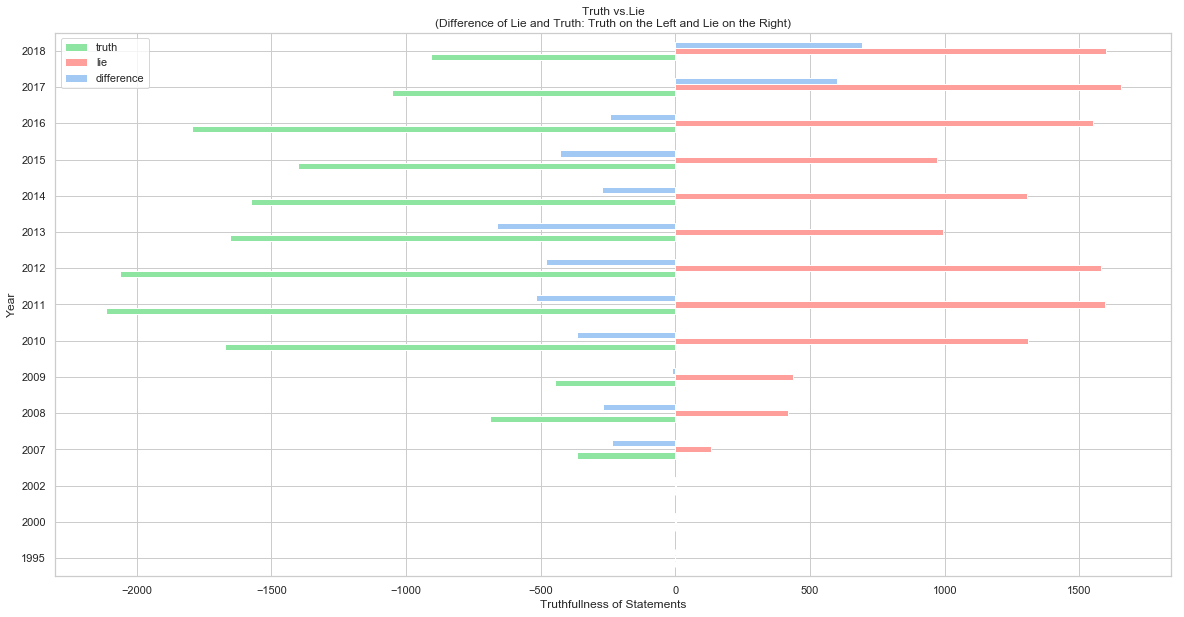

In [40]:
df_years.sort_values(by='statement_year').plot(kind='barh', figsize=figsize, color=25*['g', 'r', 'b'])

plt.title('Truth vs.Lie\n(Difference of Lie and Truth: Truth on the Left and Lie on the Right)')
plt.ylabel('Year')
plt.xlabel('Truthfullness of Statements');

plt.savefig(f"{PLOTS_DIR}/truth_vs_lie.png")

plt.show()

In this plot the truthfullness of the statement is considered. For example, pants-on-fire has more weight than just false statement.

## 3. Who are the biggest liars (people/groups/context)

### Speakers Job Title

Compare who lies more: speakers_job_title_cleaned, context_tag_clean, speaker_home_state, statemet_type 

In [41]:
df_lbls = df[['speakers_job_title_cleaned', 'label_as_nb']]
df_lbls = df_lbls.groupby(['speakers_job_title_cleaned']).sum().sort_values(by=['label_as_nb'], ascending=False)
df_lbls.head()

,label_as_nb
speakers_job_title_cleaned,
,55694.0
senator,19366.0
president,19076.0
houseman,17160.0
governor,11402.0


In [42]:
df_lbls = df[['speakers_job_title_cleaned', 'label_as_nb_repr_1']]
df_lbls = df_lbls.groupby(['speakers_job_title_cleaned'])['label_as_nb_repr_1'].agg([('label_as_nb_truth', lambda x : x[x <= 0].sum()), 
                                                                                  ('label_as_nb_lie', lambda x : x[x > 0].sum()),
                                                                                  ('label_as_nb_repr_1', lambda x : x.sum())])
df_lbls = df_lbls.groupby(['speakers_job_title_cleaned']).sum().sort_values(by=['label_as_nb_repr_1'], ascending=False)
df_lbls.head(10)

,label_as_nb_truth,label_as_nb_lie,label_as_nb_repr_1
speakers_job_title_cleaned,,,
,-4010,5377,1367
social media posting,-55,161,106
radio host,-9,70,61
website,-2,50,48
radio talk show host,-6,26,20
columnist and author,-8,26,18
talk-show host,0,15,15
political commentator and radio talk show host,-1,15,14
state delegate,-11,22,11


In [43]:
df_lbls = df[['speakers_job_title_cleaned', 'label_as_nb_repr_2']]
df_lbls = df_lbls.groupby(['speakers_job_title_cleaned']).sum().sort_values(by=['label_as_nb_repr_2'], ascending=False)
df_lbls.head(10)

,label_as_nb_repr_2
speakers_job_title_cleaned,
,5377
president,1385
houseman,1267
senator,1195
governor,775
congressman,616
social media posting,161
milwaukee county executive,155
u.s. energy secretary,146


### Context Tag Clean

In [44]:
df_lbls = df[['context_tag_clean', 'label_as_nb']]
df_lbls = df_lbls.groupby(['context_tag_clean']).sum().sort_values(by=['label_as_nb'], ascending=False)
df_lbls.head()

,label_as_nb
context_tag_clean,
interview,18236.0
news,13698.0
campaign,12746.0
speech,11080.0
ad,10586.0


In [45]:
df_lbls = df[['context_tag_clean', 'label_as_nb_repr_1']]
df_lbls = df_lbls.groupby(['context_tag_clean'])['label_as_nb_repr_1'].agg([('label_as_nb_truth', lambda x : x[x <= 0].sum()), 
                                                                                  ('label_as_nb_lie', lambda x : x[x > 0].sum()),
                                                                                  ('label_as_nb_repr_1', lambda x : x.sum())])
df_lbls = df_lbls.groupby(['context_tag_clean']).sum().sort_values(by=['label_as_nb_repr_1'], ascending=False)
df_lbls.head(10)

,label_as_nb_truth,label_as_nb_lie,label_as_nb_repr_1
context_tag_clean,,,
post,-408,919,511
headline,-18,460,442
internet,-16,241,225
email,-132,276,144
mail,-107,238,131
web,-101,188,87
blog,-31,106,75
media,-46,103,57
facebook,-30,86,56


In [46]:
df_lbls = df[['context_tag_clean', 'label_as_nb_repr_2']]
df_lbls = df_lbls.groupby(['context_tag_clean']).sum().sort_values(by=['label_as_nb_repr_2'], ascending=False)
df_lbls.head(10)

,label_as_nb_repr_2
context_tag_clean,
interview,1372
news,1143
campaign,992
post,919
ad,773
debate,728
speech,714
press,690
tweet,482


### Statemet Type

In [47]:
df_lbls = df[['statement_type', 'label_as_nb']]
df_lbls = df_lbls.groupby(['statement_type']).sum().sort_values(by=['label_as_nb'], ascending=False)
df_lbls.head()

,label_as_nb
statement_type,
Claim,148428.0
Attack,18970.0
Flip,246.0


In [48]:
df_lbls = df[['statement_type', 'label_as_nb_repr_1']]
df_lbls = df_lbls.groupby(['statement_type'])['label_as_nb_repr_1'].agg([('label_as_nb_truth', lambda x : x[x <= 0].sum()), 
                                                                                  ('label_as_nb_lie', lambda x : x[x > 0].sum()),
                                                                                  ('label_as_nb_repr_1', lambda x : x.sum())])
df_lbls = df_lbls.groupby(['statement_type']).sum().sort_values(by=['label_as_nb_repr_1'], ascending=False)
df_lbls.head(10)

,label_as_nb_truth,label_as_nb_lie,label_as_nb_repr_1
statement_type,,,
Attack,-1369,1621,252
Flip,-6,0,-6
Claim,-14365,11929,-2436


In [49]:
df_lbls = df[['statement_type', 'label_as_nb_repr_2']]
df_lbls = df_lbls.groupby(['statement_type']).sum().sort_values(by=['label_as_nb_repr_2'], ascending=False)
df_lbls.head(10)

,label_as_nb_repr_2
statement_type,
Claim,11929
Attack,1621
Flip,0


## 4. Do politicians coming from different states lie more?

### Speaker Home State

In [50]:
df_lbls = df[['speaker_home_state', 'label_as_nb']]
df_lbls = df_lbls.groupby(['speaker_home_state']).sum().sort_values(by=['label_as_nb'], ascending=False)
df_lbls.head()

,label_as_nb
speaker_home_state,
,45110.0
New York,16150.0
Texas,14742.0
Florida,13844.0
Wisconsin,10892.0


In [51]:
df_lbls = df[['speaker_home_state', 'label_as_nb_repr_1']]
df_lbls = df_lbls.groupby(['speaker_home_state'])['label_as_nb_repr_1'].agg([('label_as_nb_truth', lambda x : x[x <= 0].sum()), 
                                                                                  ('label_as_nb_lie', lambda x : x[x > 0].sum()),
                                                                                  ('label_as_nb_repr_1', lambda x : x.sum())])
df_lbls = df_lbls.groupby(['speaker_home_state']).sum().sort_values(by=['label_as_nb_repr_1'], ascending=False)
df_lbls.head(10)

,label_as_nb_truth,label_as_nb_lie,label_as_nb_repr_1
speaker_home_state,,,
,-2861,4773,1912
New York,-1304,1449,145
Minnesota,-56,119,63
Pennsylvania,-114,134,20
Alabama,-24,43,19
Alaska,-73,84,11
NC,-3,12,9
Iowa,-19,27,8
Montana,-5,13,8


In [52]:
df_lbls = df[['speaker_home_state', 'label_as_nb_repr_2']]
df_lbls = df_lbls.groupby(['speaker_home_state']).sum().sort_values(by=['label_as_nb_repr_2'], ascending=False)
df_lbls.head(10)

,label_as_nb_repr_2
speaker_home_state,
,4773
New York,1449
Texas,1091
Florida,880
Wisconsin,866
Virginia,392
Ohio,373
Illinois,363
Rhode Island,360


## 5. When do they lie? 

In [53]:
truhometer_labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
only_truthometer_label_idx = df['label'].isin(truhometer_labels)
df = df.loc[only_truthometer_label_idx, :]

palette={'pants-fire':'#C70509', 'false':'#DC4712', 'barely-true':'#EE712B', 'half-true':'#B0F48A', 'mostly-true':'#5EC11E', 'true':'#3E8605'}

---

## Months

In [54]:
labels_order = ["true", "mostly-true", "half-true", "barely-true", "false", "pants-fire"]

df['label'] = pd.Categorical(df['label'], labels_order)
df = df.sort_values("label", ascending=True)

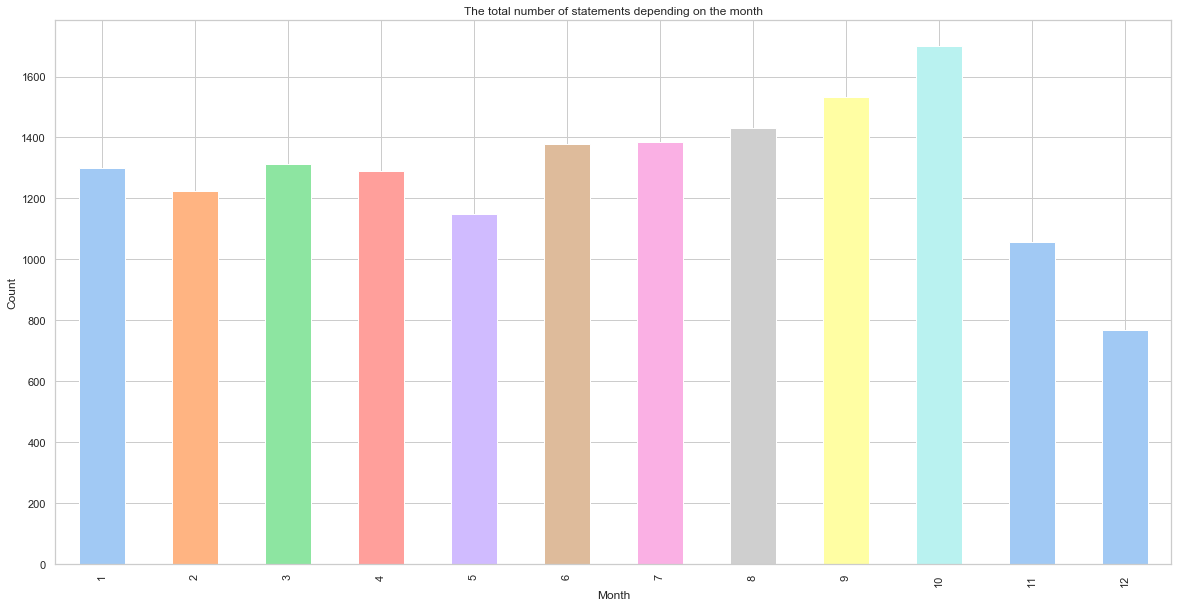

In [55]:
df["statement_date"].groupby(df["statement_date"].astype("datetime64").dt.month).count().plot(kind="bar", figsize=figsize);
plt.title('The total number of statements depending on the month')
plt.ylabel('Count')
plt.xlabel('Month');

plt.savefig(f"{PLOTS_DIR}/statement_month_count.png")

In [56]:
df['statement_month'] = df["statement_date"].astype("datetime64").dt.month

df_lbl_months = df[['statement_month', 'label']].sort_values("statement_month", ascending=True)
df_lbl_months.head()

,statement_month,label
2685,1,barely-true
11355,1,pants-fire
490,1,mostly-true
13576,1,mostly-true
13504,1,false


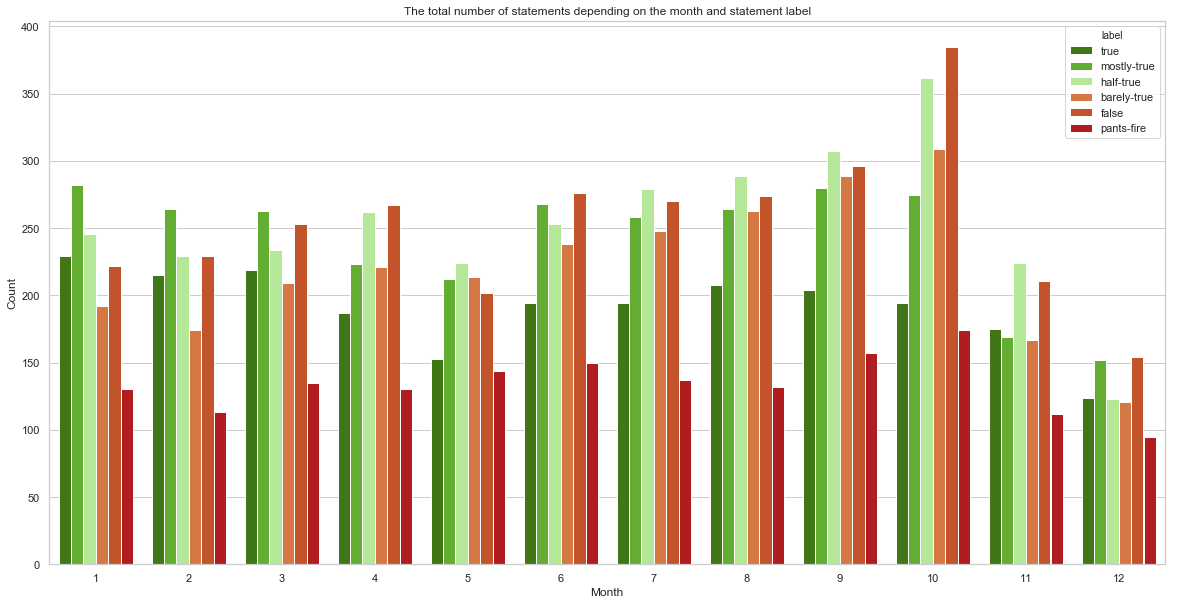

In [57]:
f, ax = plt.subplots(figsize=figsize)
ax = sns.countplot(x="statement_month", hue="label", data=df_lbl_months, ax=ax, palette=palette)

plt.title('The total number of statements depending on the month and statement label')
plt.ylabel('Count')
plt.xlabel('Month')

plt.savefig(f"{PLOTS_DIR}/statement_month_count_with_labels.png")

plt.show()

In [58]:
df1 = group_and_count(df, 'statement_month')
df2 = group_and_count(df[(df['label'] == 'false')|(df['label'] == 'half-true')|(df['label'] == 'barely-true')], 'statement_month')

df_month_false = pd.merge(df1, df2, on='statement_month', suffixes=('_total', '_false'))
df_month_false = df_month_false.sort_values("statement_month", ascending=True)

df_month_false["count_false_pct"] = df_month_false.apply(lambda row: row["count_false"]/row["count_total"]*100, axis=1)
df_month_false["count_total_pct"] = df_month_false.apply(lambda row: row["count_total"]/row["count_total"]*100, axis=1)
df_month_false.head()

,statement_month,count_total,count_false,count_false_pct,count_total_pct
6,1,1301,660,50.730208,100.0
8,2,1224,632,51.633987,100.0
5,3,1313,696,53.008378,100.0
7,4,1290,750,58.139535,100.0
9,5,1149,640,55.700609,100.0


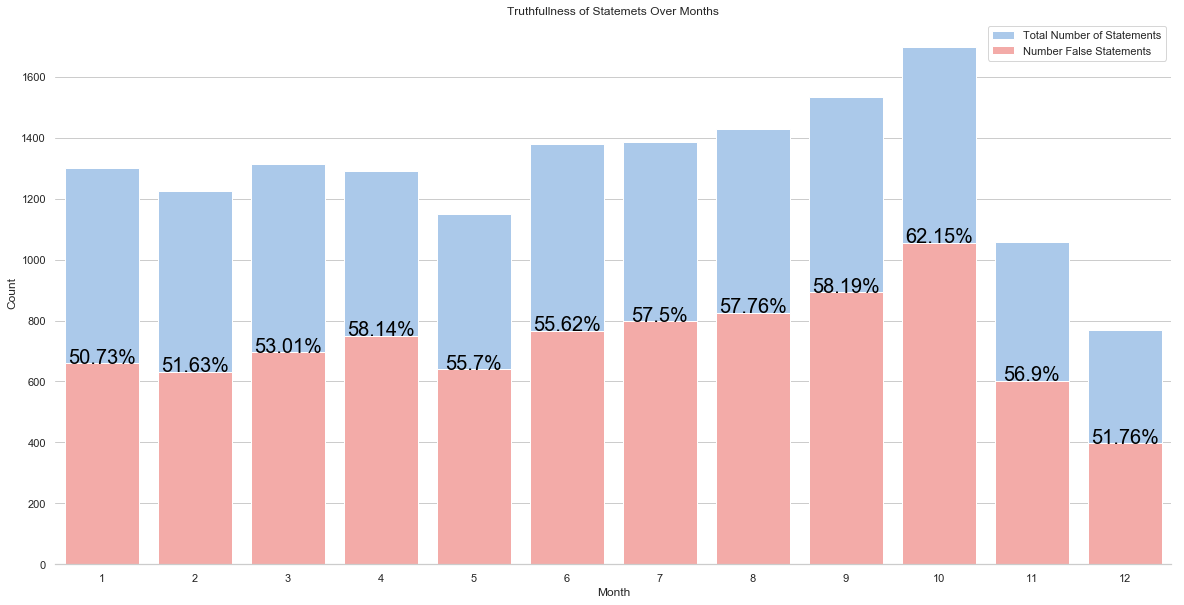

In [59]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=figsize)

# Plot the total crashes
sns.barplot(x="statement_month", y="count_total", data=df_month_false,
            label="Total Number of Statements", color="b")

# Plot the crashes where alcohol was involved
g = sns.barplot(x="statement_month", y="count_false", data=df_month_false,
            label="Number False Statements", color="r")

for idx, (_, row) in enumerate(df_month_false.iterrows()):
    g.text(idx, row.count_false, f"{round(row.count_false_pct,2)}%", color='black', ha="center", fontsize=20)

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True)
sns.despine(left=True, top=True)

plt.title('Truthfullness of Statemets Over Months')
plt.ylabel('Count')
plt.xlabel('Month')

plt.savefig(f"{PLOTS_DIR}/statement_month_count_percentage.png")

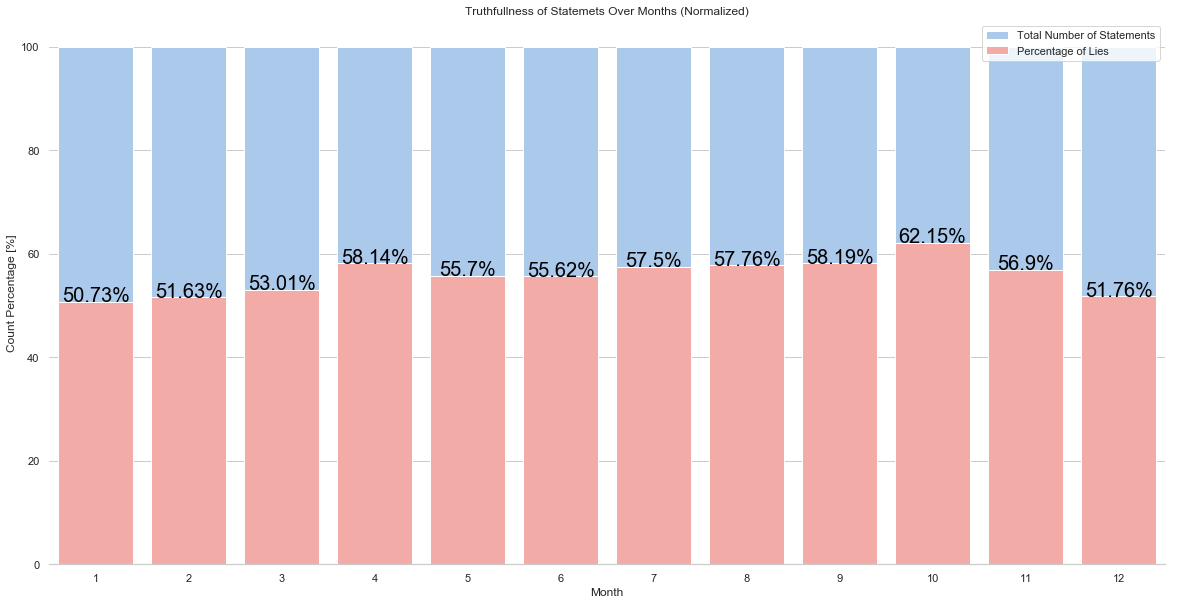

In [60]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=figsize)

# Plot the total crashes
sns.barplot(x="statement_month", y="count_total_pct", data=df_month_false,
            label="Total Number of Statements", color="b")

# Plot the crashes where alcohol was involved
g = sns.barplot(x="statement_month", y="count_false_pct", data=df_month_false,
            label="Percentage of Lies", color="r")

for idx, (_, row) in enumerate(df_month_false.iterrows()):
    g.text(idx, row.count_false_pct, f"{round(row.count_false_pct,2)}%", color='black', ha="center", fontsize=20)

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True)
sns.despine(left=True, top=True)

plt.title('Truthfullness of Statemets Over Months (Normalized)')
plt.ylabel('Count Percentage [%]')
plt.xlabel('Month')

plt.savefig(f"{PLOTS_DIR}/statement_month_count_percentage_norm.png")

---

## Week Days

In [61]:
weekdays_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df['statement_weekday'] = df["statement_date"].astype("datetime64").dt.weekday_name

df['statement_weekday'] = pd.Categorical(df['statement_weekday'], weekdays_order)
df = df.sort_values("statement_weekday", ascending=True)

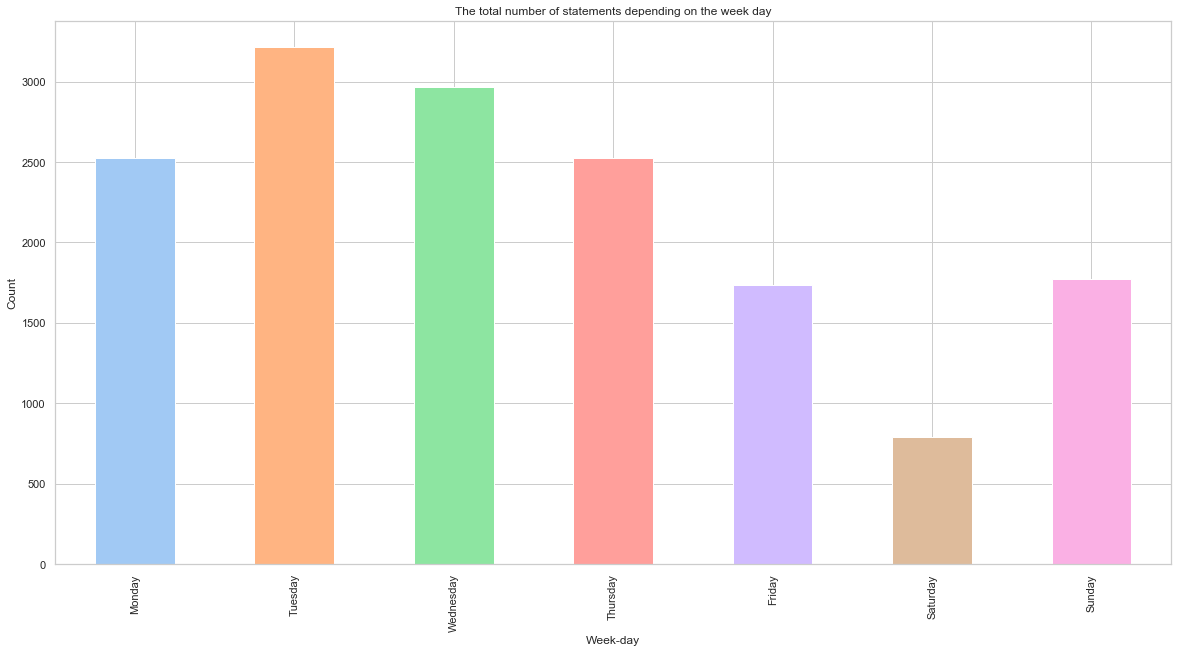

In [62]:
df["statement_weekday"].value_counts().sort_index().plot(kind="bar", figsize=figsize);

plt.title('The total number of statements depending on the week day')
plt.ylabel('Count')
plt.xlabel('Week-day')

plt.savefig(f"{PLOTS_DIR}/statement_weekday_count.png")

In [63]:
# df['statement_weekday'] = df["statement_date"].astype("datetime64").dt.weekday_name

# df['statement_weekday'] = pd.Categorical(df['statement_weekday'], weekdays_order)
df_lbl_weekday = df[['statement_weekday', 'label']].sort_values("statement_weekday", ascending=True)
df_lbl_weekday.head()

,statement_weekday,label
4088,Monday,false
13459,Monday,mostly-true
2377,Monday,false
1152,Monday,mostly-true
9997,Monday,false


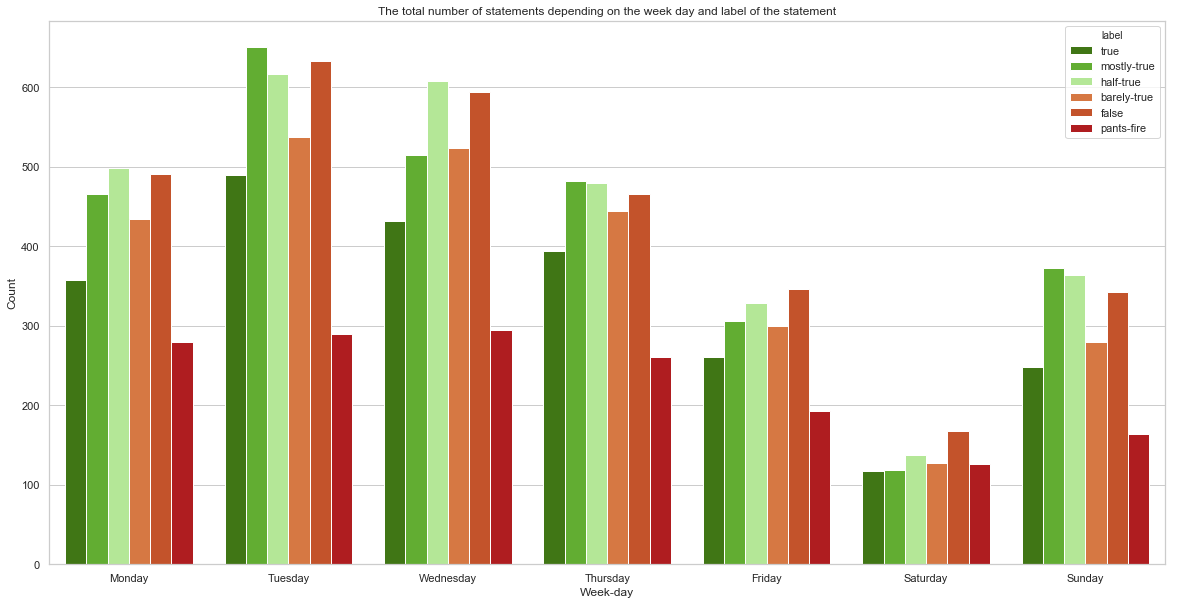

In [64]:
f, ax = plt.subplots(figsize=figsize)
ax = sns.countplot(x="statement_weekday", hue="label", data=df_lbl_weekday, ax=ax, palette=palette)

plt.title('The total number of statements depending on the week day and label of the statement')
plt.ylabel('Count')
plt.xlabel('Week-day')

plt.savefig(f"{PLOTS_DIR}/statement_weekday_count_with_labels.png")

plt.show()

In [65]:
df1 = group_and_count(df, 'statement_weekday')
df2 = group_and_count(df[(df['label'] == 'false')|(df['label'] == 'half-true')|(df['label'] == 'barely-true')], 'statement_weekday')

df_weekday_false = pd.merge(df1, df2, on='statement_weekday', suffixes=('_total', '_false'))
df_weekday_false['statement_weekday'] = pd.Categorical(df_weekday_false['statement_weekday'], weekdays_order)
df_weekday_false = df_weekday_false.sort_values("statement_weekday", ascending=True)

df_weekday_false["count_false_pct"] = df_weekday_false.apply(lambda row: row["count_false"]/row["count_total"]*100, axis=1)
df_weekday_false["count_total_pct"] = df_weekday_false.apply(lambda row: row["count_total"]/row["count_total"]*100, axis=1)
df_weekday_false.head()

,statement_weekday,count_total,count_false,count_false_pct,count_total_pct
3,Monday,2526,1423,56.334125,100.0
0,Tuesday,3217,1787,55.548648,100.0
1,Wednesday,2965,1725,58.178752,100.0
2,Thursday,2527,1390,55.005936,100.0
5,Friday,1733,974,56.203116,100.0


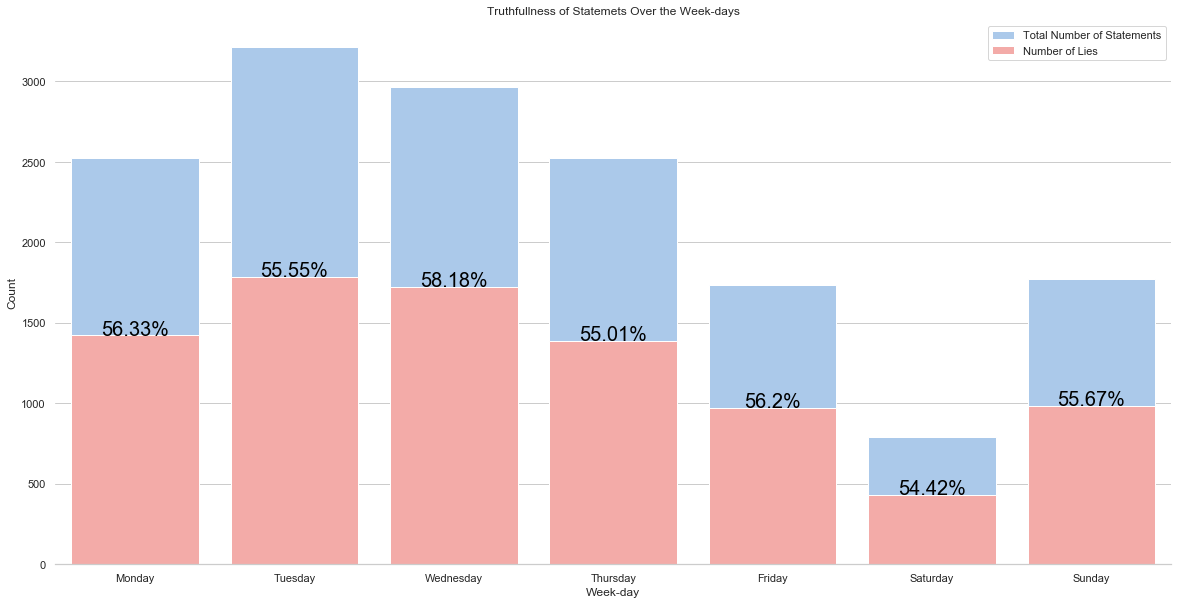

In [66]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=figsize)

# Plot the total crashes
sns.barplot(x="statement_weekday", y="count_total", data=df_weekday_false,
            label="Total Number of Statements", color="b")

# Plot the crashes where alcohol was involved
g = sns.barplot(x="statement_weekday", y="count_false", data=df_weekday_false,
            label="Number of Lies", color="r")

for idx, (_, row) in enumerate(df_weekday_false.iterrows()):
    g.text(idx, row.count_false, f"{round(row.count_false_pct,2)}%", color='black', ha="center", fontsize=20)

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True)
sns.despine(left=True, top=True)

plt.title('Truthfullness of Statemets Over the Week-days')
plt.ylabel('Count')
plt.xlabel('Week-day')

plt.savefig(f"{PLOTS_DIR}/statement_weekday_count_percentage.png")

plt.show()

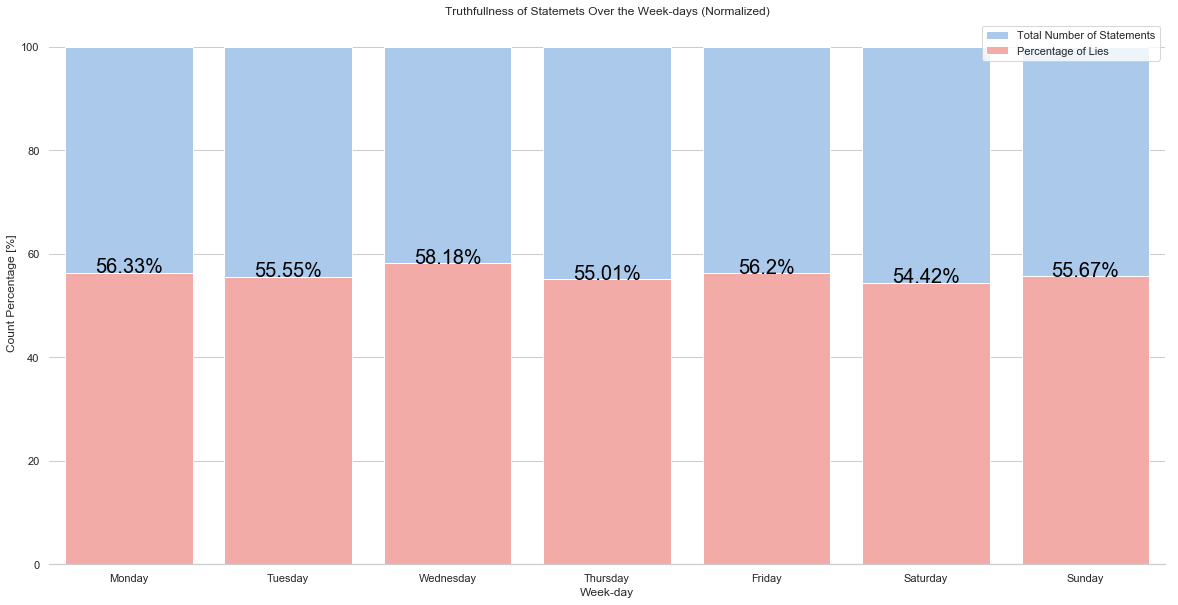

In [67]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=figsize)

# Plot the total crashes
sns.barplot(x="statement_weekday", y="count_total_pct", data=df_weekday_false,
            label="Total Number of Statements", color="b")

# Plot the crashes where alcohol was involved
g = sns.barplot(x="statement_weekday", y="count_false_pct", data=df_weekday_false,
            label="Percentage of Lies", color="r")

for idx, (_, row) in enumerate(df_weekday_false.iterrows()):
    g.text(idx, row.count_false_pct, f"{round(row.count_false_pct,2)}%", color='black', ha="center", fontsize=20)

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True)
sns.despine(left=True, top=True)

plt.title('Truthfullness of Statemets Over the Week-days (Normalized)')
plt.ylabel('Count Percentage [%]')
plt.xlabel('Week-day')

plt.savefig(f"{PLOTS_DIR}/statement_weekday_count_percentage_norm.png")

---

## Years

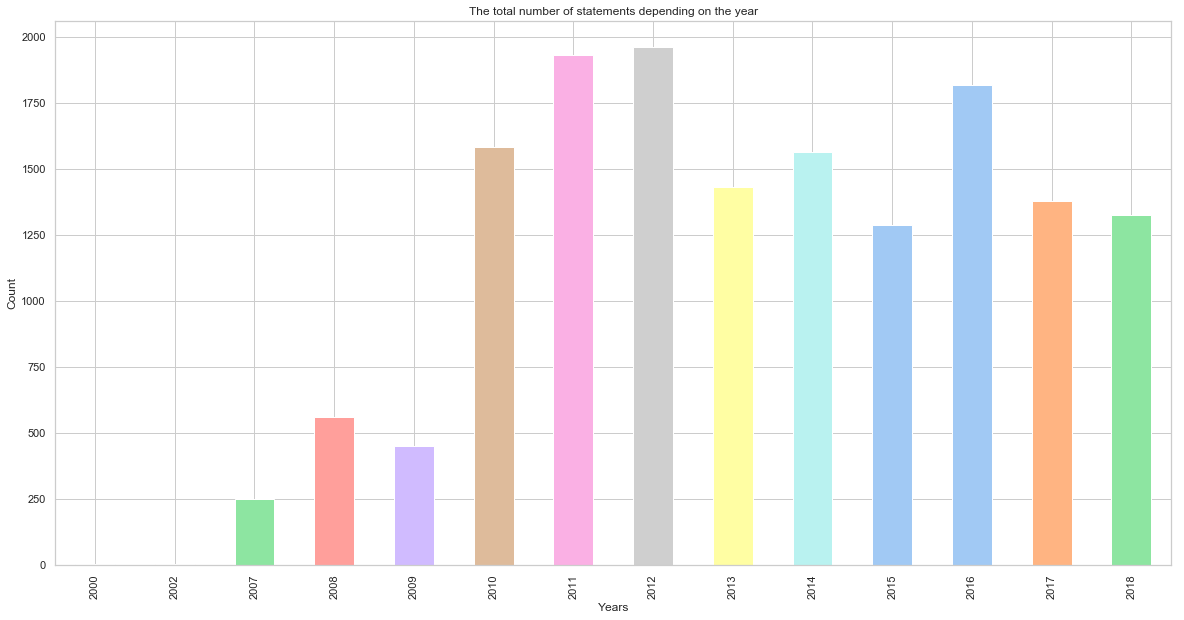

In [68]:
df["statement_date"].groupby(df["statement_date"].astype("datetime64").dt.year).count().plot(kind="bar", figsize=figsize);
plt.title('The total number of statements depending on the year')
plt.ylabel('Count')
plt.xlabel('Years')

plt.savefig(f"{PLOTS_DIR}/statement_years_count.png")

In [69]:
df['statement_year'] = df["statement_date"].astype("datetime64").dt.year

df_lbl_year = df[['statement_year', 'label']].sort_values("statement_year", ascending=True)
df_lbl_year.head()

,statement_year,label
13240,2000,false
13306,2002,barely-true
6051,2007,half-true
4175,2007,mostly-true
560,2007,false


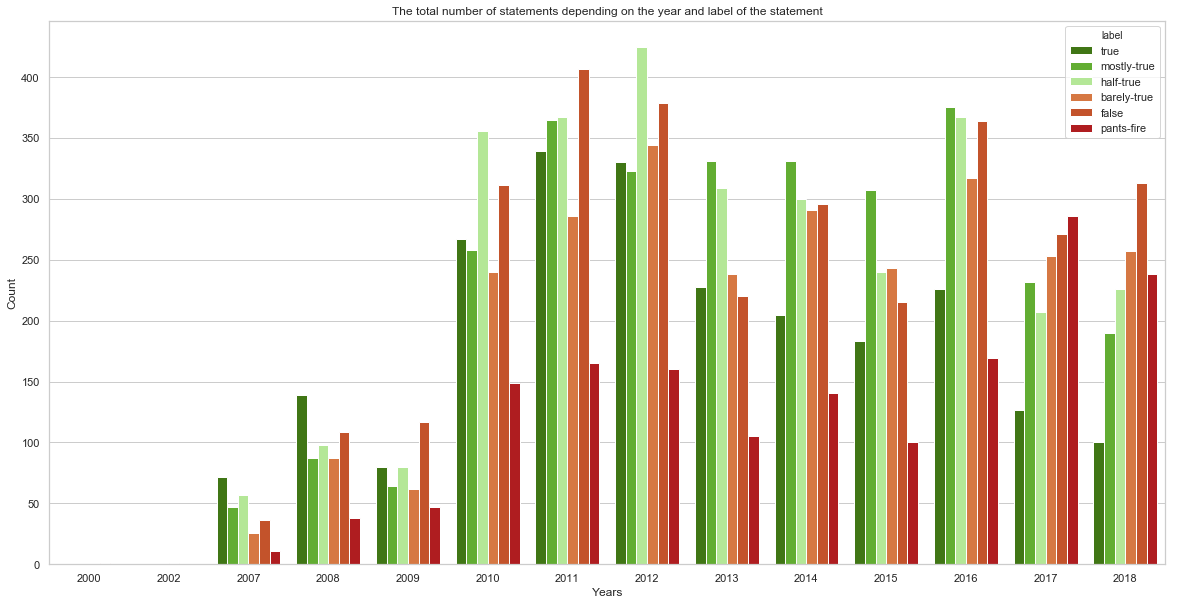

In [70]:
f, ax = plt.subplots(figsize=figsize)
ax = sns.countplot(x="statement_year", hue="label", data=df_lbl_year, ax=ax, palette=palette)

plt.title('The total number of statements depending on the year and label of the statement')
plt.ylabel('Count')
plt.xlabel('Years')

plt.savefig(f"{PLOTS_DIR}/statement_years_count_with_labels.png")

plt.show()

In [71]:
df1 = group_and_count(df, 'statement_year')
df2 = group_and_count(df[(df['label'] == 'false')|(df['label'] == 'half-true')|(df['label'] == 'barely-true')], 'statement_year')

df_year_false = pd.merge(df1, df2, on='statement_year', suffixes=('_total', '_false')).sort_values("statement_year", ascending=False)
df_year_false["count_false_pct"] = df_year_false.apply(lambda row: row["count_false"]/row["count_total"]*100, axis=1)
df_year_false["count_total_pct"] = df_year_false.apply(lambda row: row["count_total"]/row["count_total"]*100, axis=1)
df_year_false = df_year_false.sort_values("statement_year", ascending=True)
df_year_false.head()

,statement_year,count_total,count_false,count_false_pct,count_total_pct
13,2000,1,1,100.000000,100.0
12,2002,1,1,100.000000,100.0
11,2007,249,119,47.791165,100.0
9,2008,558,294,52.688172,100.0
10,2009,450,259,57.555556,100.0


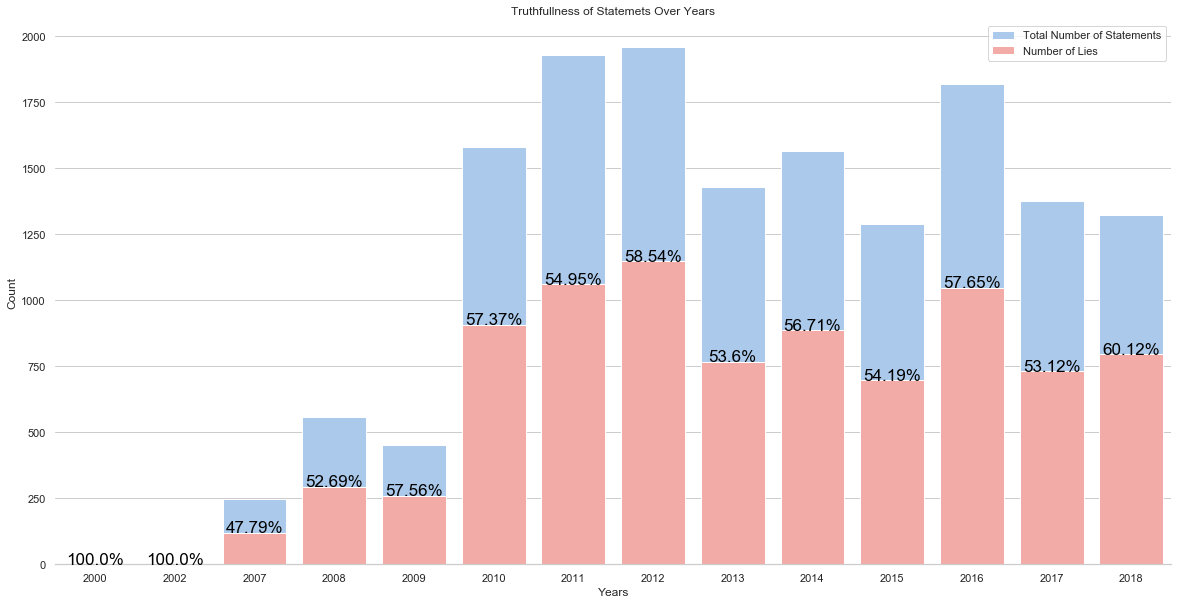

In [72]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=figsize)

# Plot the total crashes
sns.barplot(x="statement_year", y="count_total", data=df_year_false,
            label="Total Number of Statements", color="b")

# Plot the crashes where alcohol was involved
g = sns.barplot(x="statement_year", y="count_false", data=df_year_false,
            label="Number of Lies", color="r")

for idx, (_, row) in enumerate(df_year_false.iterrows()):
    g.text(idx, row.count_false, f"{round(row.count_false_pct,2)}%", color='black', ha="center", fontsize=17)

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True)
sns.despine(left=True, top=True)

plt.title('Truthfullness of Statemets Over Years')
plt.ylabel('Count')
plt.xlabel('Years')

plt.savefig(f"{PLOTS_DIR}/statement_years_count_percentage.png")

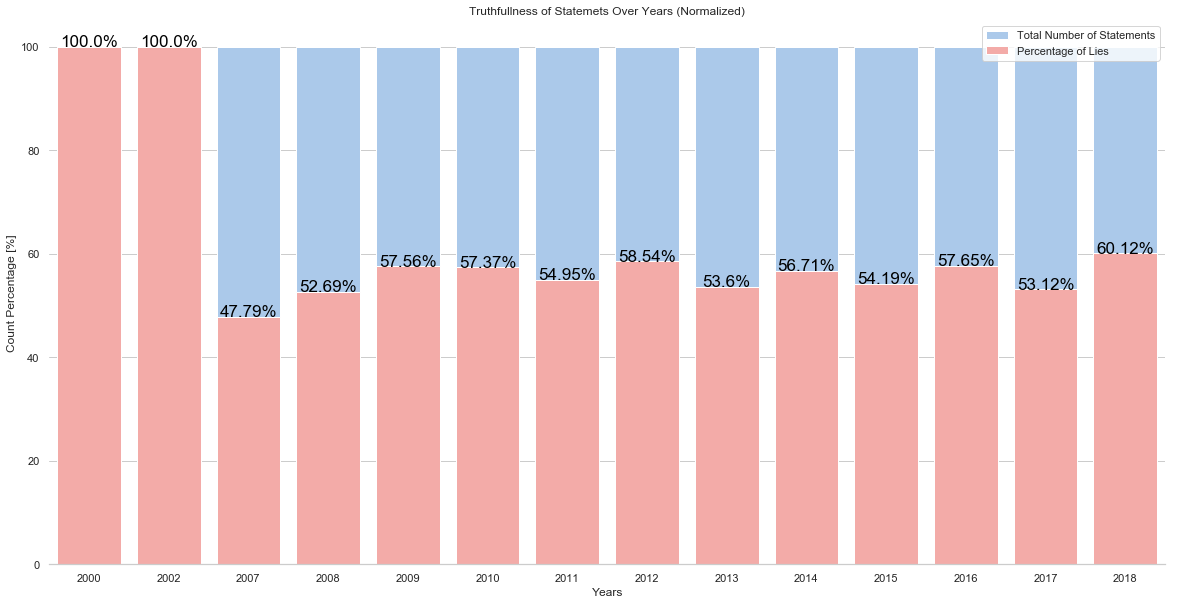

In [73]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=figsize)

# Plot the total crashes
sns.barplot(x="statement_year", y="count_total_pct", data=df_year_false,
            label="Total Number of Statements", color="b")

# Plot the crashes where alcohol was involved
g = sns.barplot(x="statement_year", y="count_false_pct", data=df_year_false,
            label="Percentage of Lies", color="r")

for idx, (_, row) in enumerate(df_year_false.iterrows()):
    g.text(idx, row.count_false_pct, f"{round(row.count_false_pct,2)}%", color='black', ha="center", fontsize=17)

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True)
sns.despine(left=True, top=True)

plt.title('Truthfullness of Statemets Over Years (Normalized)')
plt.ylabel('Count Percentage [%]')
plt.xlabel('Years')

plt.savefig(f"{PLOTS_DIR}/statement_years_count_percentage_norm.png")

## 6. Cantons

In [105]:
import branca.colormap as cm
import folium
import json
from os.path import join

In [141]:
center_coord = {'lon': 0, 'lat': 0} # roughly the "center" of Switzerland
default_map_values = {
    "width": '100%',
    "location": list(center_coord.values()),
    "zoom_start": 1, # starting zoom when displaying map
    #"min_zoom": 7, # minimum available zoom for the displayed map
    "max_zoom": 11, # maximum available zoom for the displayed map
    "control_scale": True, # adding a scale to the map
    "tiles": None
}

In [143]:
switzerland_map = folium.Map(**default_map_values)

folium.TopoJson(
    open('data/us-states.topojson.json', 'r'),
    'objects.states',
    name='topojson'
).add_to(switzerland_map)


switzerland_map

In [184]:
states_list1 = {
    "05": "ARKANSAS",
"06":"CALIFORNIA",
"17":"ILLINOIS",
"20":"KANSAS",
"28":"MISSISSIPPI",
"39":"OHIO",
"48":"TEXAS",
"01":"ALABAMA",
"19":"IOWA",
"22":"LOUISIANA",
"27":"MINNESOTA",
"29":"MISSOURI",
"31":"NEBRASKA",
"04":"ARIZONA",
"08":"COLORADO",
"18":"INDIANA",
"26":"MICHIGAN",
"30":"MONTANA",
"36":"NEW YORK",
"41":"OREGON",
"51":"VIRGINIA",
"56":"WYOMING",
"37":"NORTH CAROLINA",
"40":"OKLAHOMA",
"47":"TENNESSEE",
"55":"WISCONSIN",
"02":"ALASKA",
"50":"VERMONT",
"38":"NORTH DAKOTA",
"13":"GEORGIA",
"23":"MAINE",
"44":"RHODE ISLAND",
"54":"WEST VIRGINIA",
"16":"IDAHO",
"46":"SOUTH DAKOTA",
"35":"NEW MEXICO",
"53":"WASHINGTON D.C.",
"42":"PENNSYLVANIA",
"12":"FLORIDA",
"49":"UTAH",
"21":"KENTUCKY",
"33":"NEW HAMPSHIRE",
"45":"SOUTH CAROLINA",
"32":"NEVADA",
"15":"HAWAII",
"34":"NEW JERSEY",
"09":"CONNECTICUT",
"24":"MARYLAND",
"25":"MASSACHUSETTS",
"10":"DELAWARE",
"11":"DISTRICT OF COLUMBIA",}
states_list2 = dict((y,x) for x,y in states_list1.items())

In [185]:
state_statements_count = group_and_count(df, 'speaker_home_state', with_pct=True)
state_statements_count["state_fips"] = state_statements_count.apply(lambda row: states_list2.get(row['speaker_home_state'].upper(), np.nan),axis=1)
state_statements_count.head(100)

,speaker_home_state,count,count_pct,state_fips
0,,3816,24.570214,NaN
1,New York,1453,9.355483,36
2,Texas,1402,9.027107,48
3,Florida,1343,8.647222,12
4,Wisconsin,993,6.393664,55
5,Illinois,743,4.783980,17
6,Ohio,613,3.946945,39
7,Georgia,562,3.618569,13
8,Virginia,510,3.283755,51
9,Rhode Island,456,2.936063,44


In [186]:
linear = cm.LinearColormap(
    ['white', 'purple'],
    vmin=0, vmax=1453
)



def my_color_function(feature):
    sid = feature['id']
    state_name = states_list1[sid]
    

    try:
        voters_num = state_statements_count[sid == state_statements_count['state_fips']]['count'].values[0]
        print(voters_num)
        if not np.isnan(voters_num):
            return linear(voters_num)
        else:
            return '#d3d3d3'
    except KeyError:
        return '#d3d3d3'
    

m = folium.Map(**default_map_values)

folium.TopoJson(
    open('data/us-states.topojson.json', 'r', encoding='utf-8'),
    'objects.states',
    name='topojson',
    style_function=lambda feature: {
        'fillColor': my_color_function(feature),
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5',
        'fillOpacity': 0.7
    }
).add_to(m)

# linear.caption = 'UDC SVP Voter percentage [%]'
# linear.add_to(m)

m
#m.save(join('plots', 'udc-svp_votes.folium.map.html'))



ARKANSAS
108
CALIFORNIA
299
ILLINOIS
743
KANSAS
22
MISSISSIPPI
2
OHIO
613
TEXAS
1402
ALABAMA
45
IOWA
28
LOUISIANA
34
MINNESOTA
84
MISSOURI
118
NEBRASKA
5
ARIZONA
230
COLORADO
31
INDIANA
66
MICHIGAN
30
MONTANA
8
NEW YORK
1453
OREGON
323
VIRGINIA
510
WYOMING
4
NORTH CAROLINA
140
OKLAHOMA
24
TENNESSEE
96
WISCONSIN
993
ALASKA
79
VERMONT
143
NORTH DAKOTA
25
GEORGIA
562
MAINE
3
RHODE ISLAND
456
WEST VIRGINIA
36
IDAHO
6
SOUTH DAKOTA
5
NEW MEXICO
37
WASHINGTON D.C.
4
PENNSYLVANIA
142
FLORIDA
1343
UTAH
28
KENTUCKY
104
NEW HAMPSHIRE
160
SOUTH CAROLINA
46
NEVADA
57
HAWAII
1
NEW JERSEY
309
CONNECTICUT
33
MARYLAND
93
MASSACHUSETTS
247
DELAWARE
83
DISTRICT OF COLUMBIA
16


In [179]:
# m;
# IFrame(src='count_states', width=1000, height=500)

In [194]:
state_statements_count = group_and_count(df, ['speaker_home_state', 'label'], with_pct=True)
state_statements_count["state_fips"] = state_statements_count.apply(lambda row: states_list2.get(row['speaker_home_state'].upper(), np.nan),axis=1)
state_statements_count.head(100)

,speaker_home_state,label,count,count_pct,state_fips
0,,pants-fire,864,5.563067,NaN
1,,false,780,5.022214,NaN
2,,half-true,643,4.140107,NaN
3,,barely-true,621,3.998455,NaN
4,,mostly-true,506,3.258000,NaN
5,New York,false,411,2.646320,36
6,,true,402,2.588372,NaN
7,Florida,mostly-true,306,1.970253,12
8,Florida,half-true,302,1.944498,12
9,Texas,half-true,278,1.789968,48


In [203]:
linear = cm.LinearColormap(
    ['white', 'red'],
    vmin=0, vmax=500
)



def my_color_function(feature):
    sid = feature['id']
    state_name = states_list1[sid]
    
    
    #print(state_name)
    #return '#d3d3d3'

    try:
        voters_num = state_statements_count[(sid == state_statements_count['state_fips'])&
                                            ((state_statements_count['label'] == 'false')|
                                             (state_statements_count['label'] == 'barely-true')|
                                             (state_statements_count['label'] =='pants-fire'))]['count'].values.sum()
        if not np.isnan(voters_num):
            return linear(voters_num)
        else:
            return '#d3d3d3'
    except KeyError:
        return '#d3d3d3'
    

m = folium.Map(**default_map_values)

folium.TopoJson(
    open('data/us-states.topojson.json', 'r', encoding='utf-8'),
    'objects.states',
    name='topojson',
    style_function=lambda feature: {
        'fillColor': my_color_function(feature),
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5',
        'fillOpacity': 0.7
    }
).add_to(m)

# linear.caption = 'UDC SVP Voter percentage [%]'
# linear.add_to(m)

m
#m.save(join('plots', 'udc-svp_votes.folium.map.html'))



## 7. Do they lie more when doing federal vs state politics?

In [74]:
# TODO: Sam 

## 8. Is there a correlation between politicians being voted out of office and their lies?

In [75]:
# TODO: Sam